# Исследование данных о продажах игр, оценок пользователей и экспертов, жанров и платформ.

###### Цель:
Выявить определяющие успешность игры закономерности. 

###### Задачи:
- Подготовить данные
- Провести исследовательский анализ данных
- Составить портрет пользователя каждого региона
- Проверить гипотезы

## 1 Открываем таблицу и изучаем общую информацию о данных.

In [2]:
import pandas as pd

try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')  
except:
    pass

In [3]:
display(df.head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


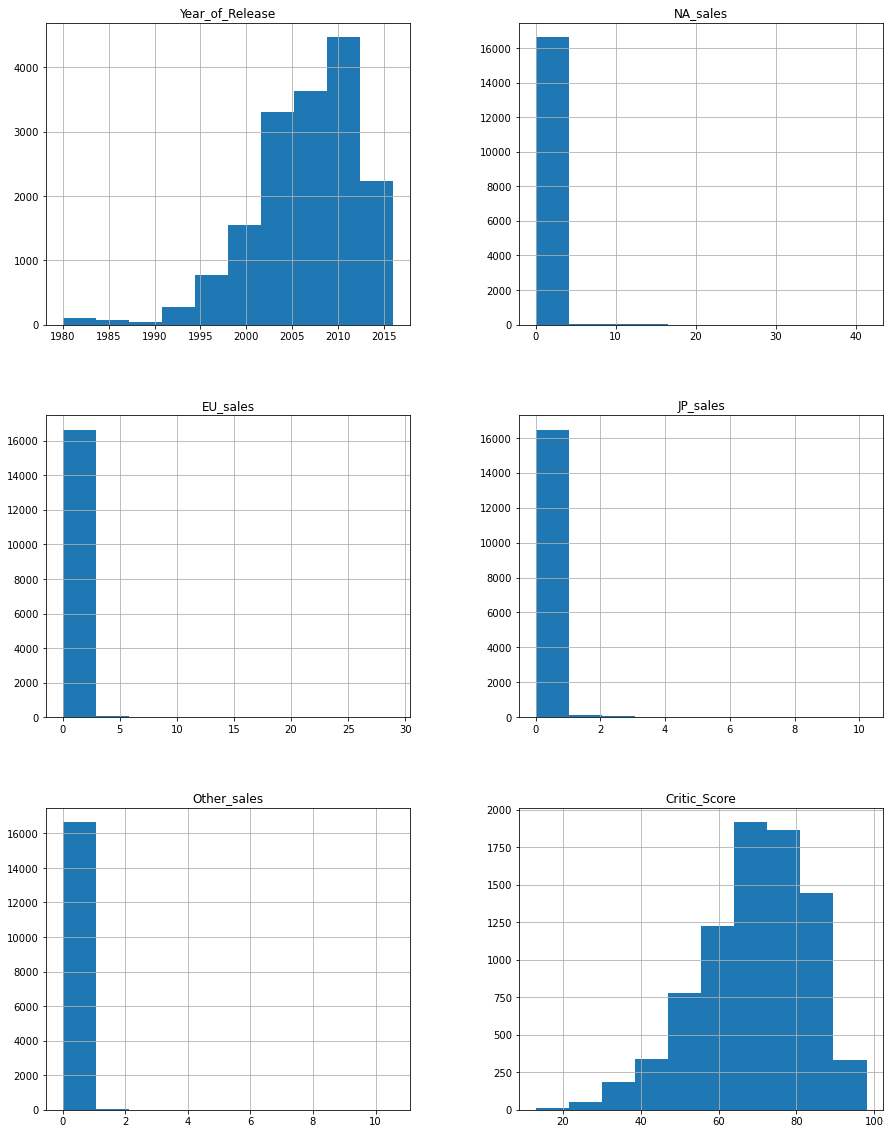

In [5]:
df.hist(figsize=(15, 20));

##### Проверка на явные дубликаты

In [6]:
df.duplicated().sum()

0

##### Количество пропусков по столбцам

In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Вывод по полученной информации:

- названия столбцов не одного регистра
- Name - пропуски < 5%
- Year_of_Release  - пропуски < 5%, изменить тип данных
- Genre - пропуски < 5%
- Critic_Score - большое количество пропусков (около 50%), изменить тип данных
- User_Score - большое количество пропусков (около 40%), изменить тип данных
- Rating - большое количество пропусков (около 40%)

##  2 Предобработка данных

##### Изменение регистра столбцов

In [8]:
df.columns = map(lambda x: str(x).lower(), df.columns)

##### Пропуск нулевых значений в столбце name, так как их незначительно мало.

In [9]:
df['name'] = df['name'].fillna(0)
df = df[df['name'] != 0]
df['name'] = df['name'].str.lower()

In [10]:
df['platform'] = df['platform'].str.lower()
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

##### Изменение типа данных столбца year_of_release

In [11]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df = df[df['year_of_release'] > 0]
df['year_of_release'] = df['year_of_release'].astype('int')

In [12]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [13]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [14]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

##### Поставим заглушки вместо пропусков

In [15]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1
df['user_score'] = df['user_score'].astype('float')
df['user_score'] = df['user_score'].astype('int')

In [16]:
df['rating'] = df['rating'].fillna('TBD')

In [17]:
df['rating'].unique()

array(['E', 'TBD', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [19]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  int32  
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


### По итогу проделанной работы: 

- был обработан датафрейм, в котором не осталось нулевых значений в столбцах name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales.
- определены в столбце user_score дополнительные пропуски - tbd (To Be Determined), что значит рейтинг ещё не определен. 
- добавлен новый столбец с общими продажами

## 3 Исследовательский анализ данных

##### Посмотрим, сколько игр выпускалось в разные годы.

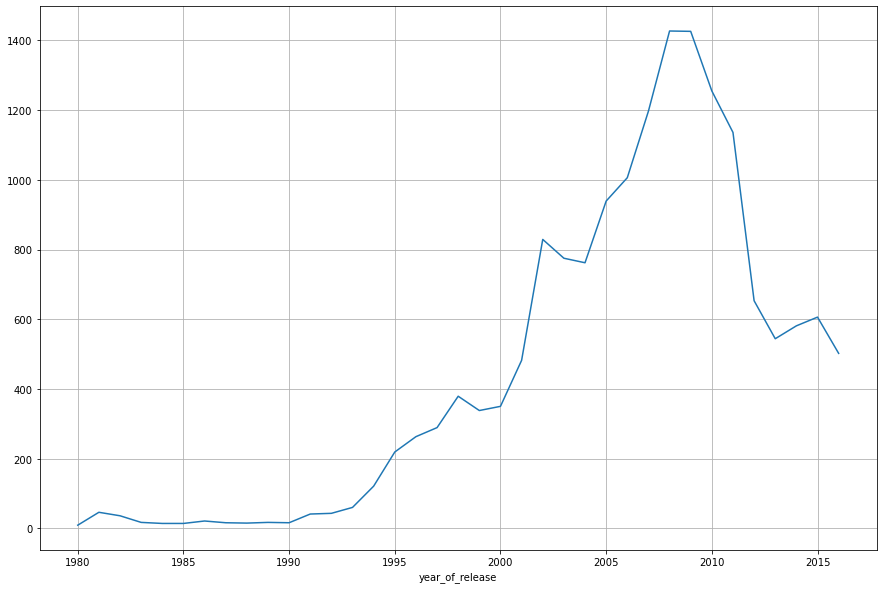

In [21]:
year_count = df.groupby('year_of_release')['name'].count()
year_count.plot(grid=True, figsize=(15, 10));

По графику видно, что пик продаж был с 2005 по 2011.

Для составления прогноза на 2017 год следует взять промежуток 2015-2016 года.

##### Посмотрим, как менялись продажи по платформам, выделим самые популярные за все время

In [26]:
platform_year = df.groupby(['platform', 'year_of_release'])['name'].count()

In [27]:
platform_year.tail(30)

platform  year_of_release
wiiu      2015                28
          2016                14
ws        1999                 2
          2000                 2
          2001                 2
x360      2005                18
          2006                93
          2007               123
          2008               146
          2009               172
          2010               182
          2011               206
          2012               106
          2013                75
          2014                63
          2015                35
          2016                13
xb        2000                 1
          2001                33
          2002               158
          2003               189
          2004               177
          2005               179
          2006                62
          2007                 3
          2008                 1
xone      2013                19
          2014                61
          2015                80
          2016   

In [28]:
platform_year.head(30)

platform  year_of_release
2600      1980                 9
          1981                46
          1982                36
          1983                11
          1984                 1
          1985                 1
          1986                 2
          1987                 6
          1988                 2
          1989                 2
3do       1994                 1
          1995                 2
3ds       2011               116
          2012                93
          2013                91
          2014                80
          2015                86
          2016                46
dc        1998                 7
          1999                14
          2000                20
          2001                 8
          2002                 1
          2007                 1
          2008                 1
ds        1985                 1
          2004                23
          2005               118
          2006               201
          2007   

In [29]:
platform_year = df.groupby(['year_of_release', 'platform'])['year_of_release'].count()
platform_year.head(35)

year_of_release  platform
1980             2600         9
1981             2600        46
1982             2600        36
1983             2600        11
                 nes          6
1984             2600         1
                 nes         13
1985             2600         1
                 ds           1
                 nes         11
                 pc           1
1986             2600         2
                 nes         19
1987             2600         6
                 nes         10
1988             2600         2
                 gb           1
                 nes         11
                 pc           1
1989             2600         2
                 gb          10
                 nes          5
1990             gb           3
                 gen          1
                 nes          8
                 snes         4
1991             gb           9
                 gen          1
                 nes          7
                 snes        24
1992          

In [30]:
plat_sales = df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)
plat_sales

platform
ps2     1233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
pc       255.76
gb       254.43
xb       251.57
nes      251.05
n64      218.01
snes     200.04
gc       196.73
xone     159.32
2600      86.48
wiiu      82.19
psv       53.81
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: total_sales, dtype: float64

In [22]:
#Срок жизни платформы
platform_year_1 = df.groupby(['platform', 'year_of_release']).agg({'name': 'nunique'}).reset_index()

In [23]:
median_name = platform_year_1['name'].median() // 10 
# 10% в целом количество игр от медианы, чтобы не учитывать года в которые игры выходили поштучно

In [24]:
platform_year_2 = platform_year_1[platform_year_1['name'] >= median_name]

In [25]:
platform_year_2.groupby('platform').agg({'year_of_release': 'count'})['year_of_release'].describe()

count    26.000000
mean      7.807692
std       4.552092
min       1.000000
25%       5.000000
50%       7.000000
75%      10.750000
max      23.000000
Name: year_of_release, dtype: float64

Средняя продолжительность жизни платформы - 10 лет. 

Есть явные любимчики - ps2, ds - игры на которые продавались по 20 лет, а так же неудачно выходившие платформы, которые просуществовали год-два.

Пик продаж у платформы наступает на середине жизни платформы.

##### Возьмем актуальный промежуток времени (2015, 2016 года) и актуальные платформы для этого временного промежутка, по которым сможем спрогнозировать продажи на 2017 год.

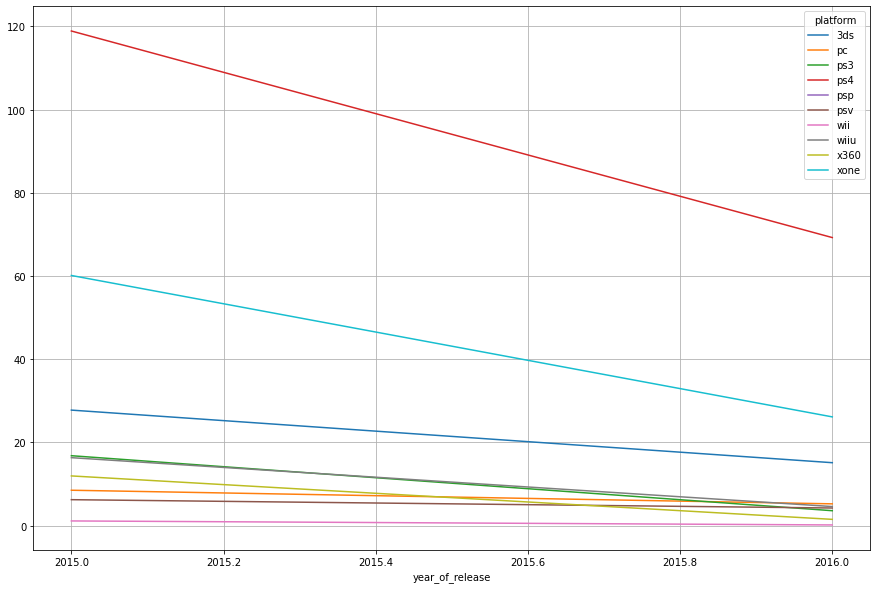

In [31]:
df_actual = df.query("year_of_release == [2015, 2016]")
df_actual.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    grid=True, figsize=(15,10));

Выберем из этого только актуальные платформы: xone, ps4, 3ds

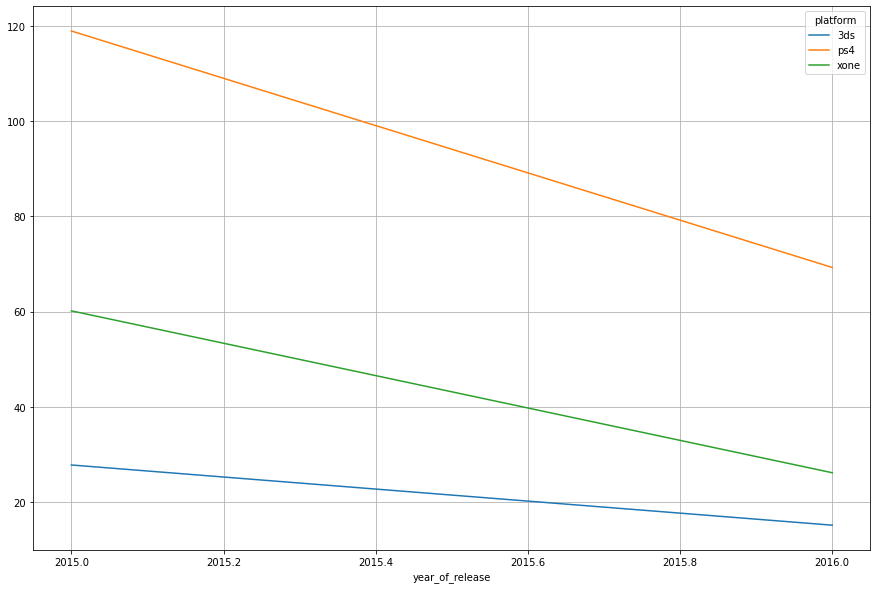

In [32]:
df_actual = df.query("year_of_release == [2015, 2016] & platform == ['xone', 'ps4', '3ds']")
df_actual.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    grid=True, figsize=(15,10));

In [33]:
df_actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,132.0,0.325152,0.798620,0.01,0.030,0.09,0.2325,7.14
ps4,301.0,0.625083,1.457063,0.01,0.050,0.12,0.4200,14.63
xone,167.0,0.516707,0.965940,0.01,0.035,0.13,0.5550,7.39


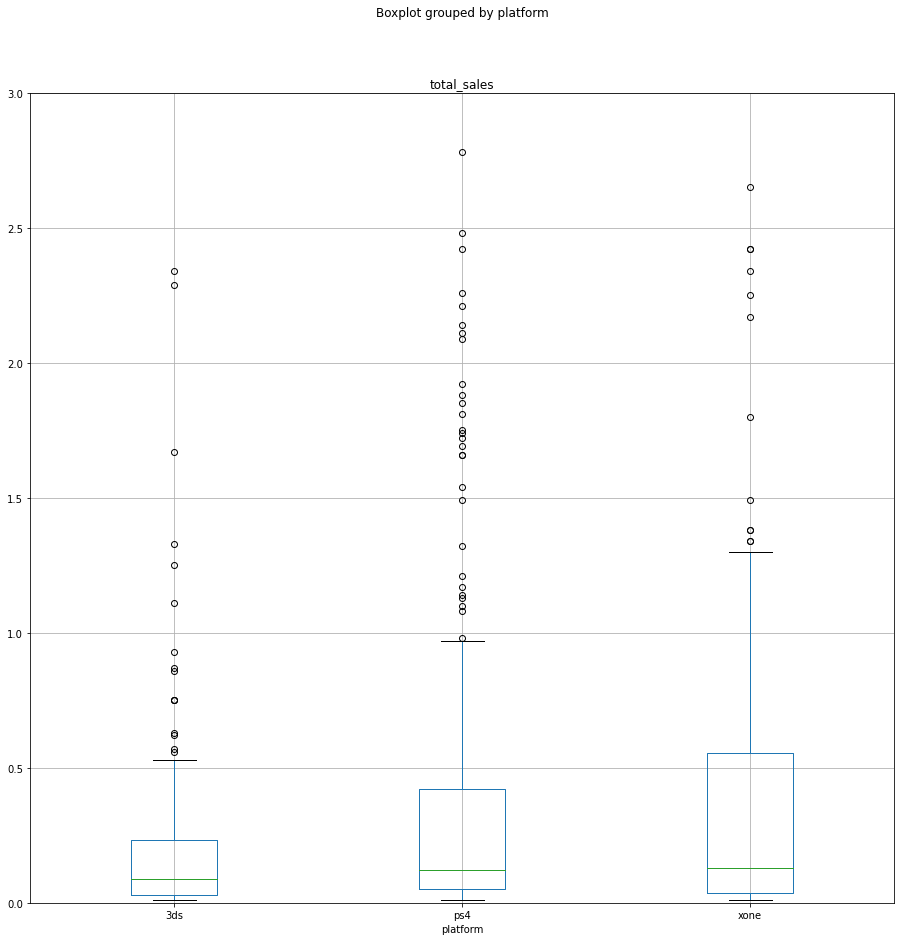

In [34]:
import matplotlib.pyplot as plt
df_actual.boxplot(column='total_sales', by='platform', figsize=(15,15));
plt.ylim(0,3);

Выбросы на графике, скорее всего игры, которые продались огромным тиражом, которые стоит учитывать в дальнейшем анализе.

##### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
Для анализа возьмем платформу XBox One (xone), так как на "ящике с усами" разница между 25% и 75% самая большая.

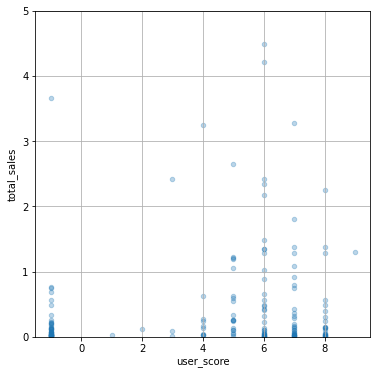

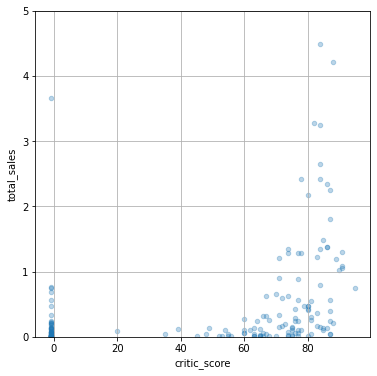

In [35]:
df_actual[
    df_actual['platform'] == 'xone'
].plot(
    x='user_score', y='total_sales', grid=True, kind='scatter', alpha=0.3, figsize=(6,6)
);
plt.ylim(0,5);
df_actual[
    df_actual['platform'] == 'xone'
].plot(
    x='critic_score', y='total_sales', grid=True, kind='scatter', alpha=0.3, figsize=(6,6)
);
plt.ylim(0,5);

In [36]:
df_xone = df_actual[df_actual['platform'] == 'xone']
df_xone_corr = df_actual['user_score'].corr(df_actual['total_sales'])
df_xone_corr
print(f'Корреляция = {df_xone_corr}, положительная, слабая')

Корреляция = 0.09552831903203036, положительная, слабая


In [37]:
df_xone = df_actual[df_actual['platform'] == 'xone']
df_xone_corr = df_actual['critic_score'].corr(df_actual['total_sales'])
df_xone_corr
print(f'Корреляция = {df_xone_corr}, положительная, слабая')

Корреляция = 0.19275997250951787, положительная, слабая


Вывод: отзывы как покупателей так и критиков слабо влияют на продажи игр на платформe xone.

##### Посмотрим на зависимости с продажами игр на других платформах.

In [38]:
df.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,116.0,0.745517,0.956160,0.07,0.3075,0.480,0.7800,7.81
3do,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3ds,512.0,0.503535,1.441271,0.01,0.0500,0.120,0.3325,14.60
dc,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
ds,2121.0,0.378491,1.436042,0.01,0.0500,0.110,0.2700,29.80
gb,97.0,2.622990,5.390925,0.06,0.3000,1.180,2.1800,31.38
gba,811.0,0.385795,0.899654,0.01,0.0550,0.160,0.3900,15.84
gc,542.0,0.362970,0.693974,0.01,0.0600,0.150,0.3675,7.06
gen,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


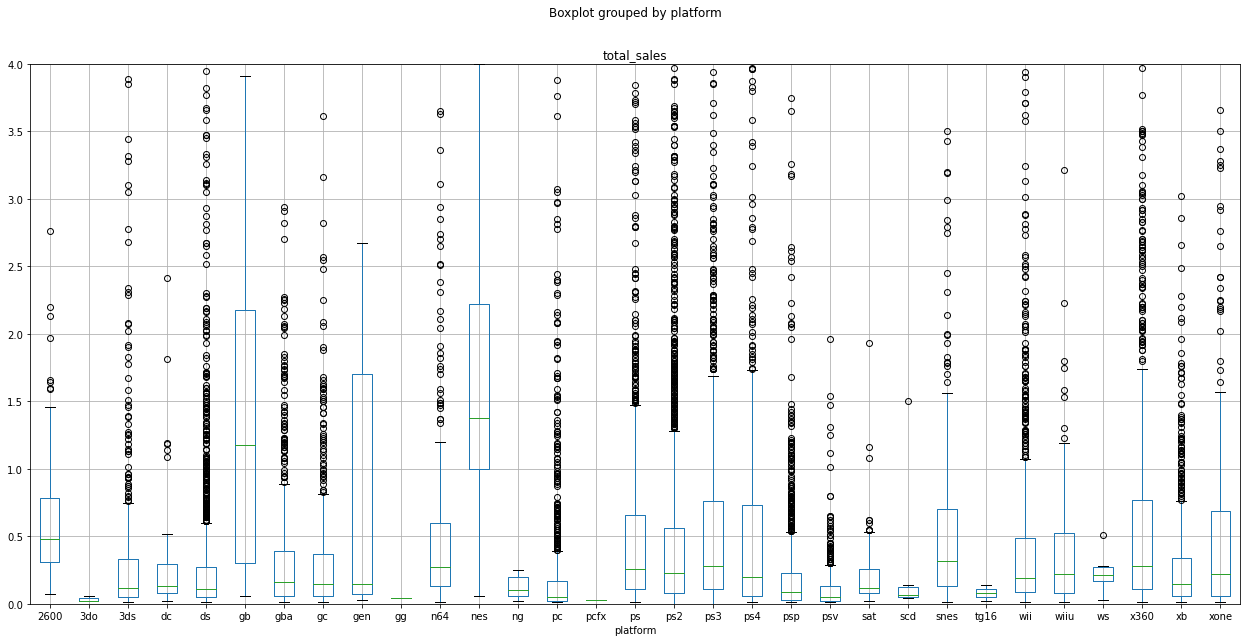

In [39]:
df.boxplot(column='total_sales', by='platform', figsize=(21,10));
plt.ylim(0,4);

Вывод: выбросы на графике, скорее всего игры, которые продались огромным тиражом.

In [40]:
df_all_platf = df_actual[df_actual['platform'] != 'xone']
df_all_platf_corr = df_actual['critic_score'].corr(df_actual['total_sales'])
print(f'Корреляция = {df_all_platf_corr}, положительная, слабая')

Корреляция = 0.19275997250951787, положительная, слабая


In [41]:
df_all_platf_corr = df_actual['user_score'].corr(df_actual['total_sales'])
print(f'Корреляция = {df_all_platf_corr}, положительная, слабая')

Корреляция = 0.09552831903203036, положительная, слабая


Вывод: отзывы как покупателей так и критиков слабо влияют на продажи игр на остальных платформах.

##### Посмотрим на общее распределение игр по жанрам.

In [42]:
df_genre_total_sales = df.pivot_table(
    index='genre', 
    values='total_sales',
    aggfunc='sum').sort_values(by='total_sales',ascending=False)

In [43]:
df_genre_total_sales.head(5)

,total_sales
genre,
Action,1716.52
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,825.55


In [44]:
df_genre_total_sales.tail(5)

,total_sales
genre,
Fighting,442.66
Simulation,387.96
Puzzle,239.89
Adventure,233.33
Strategy,172.57


In [45]:
df_genre_median_sales = df.pivot_table(
    index='genre', 
    values='total_sales',
    aggfunc='median').sort_values(by='total_sales',ascending=False)

In [46]:
df_genre_median_sales.head(5)

,total_sales
genre,
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19


In [47]:
df_genre_median_sales.tail(5)

,total_sales
genre,
Misc,0.16
Simulation,0.15
Puzzle,0.10
Strategy,0.10
Adventure,0.05


Action, Sports, Shooter	- продаются огромными тиражами.
Медианное значение проданных копий во всем мире говорит что Platform, Shooter, Sports - стабильнее продаются.
Strategy, Adventure, Puzzle - самые не популярные жанры.

## 4 Портрет пользователя каждого региона

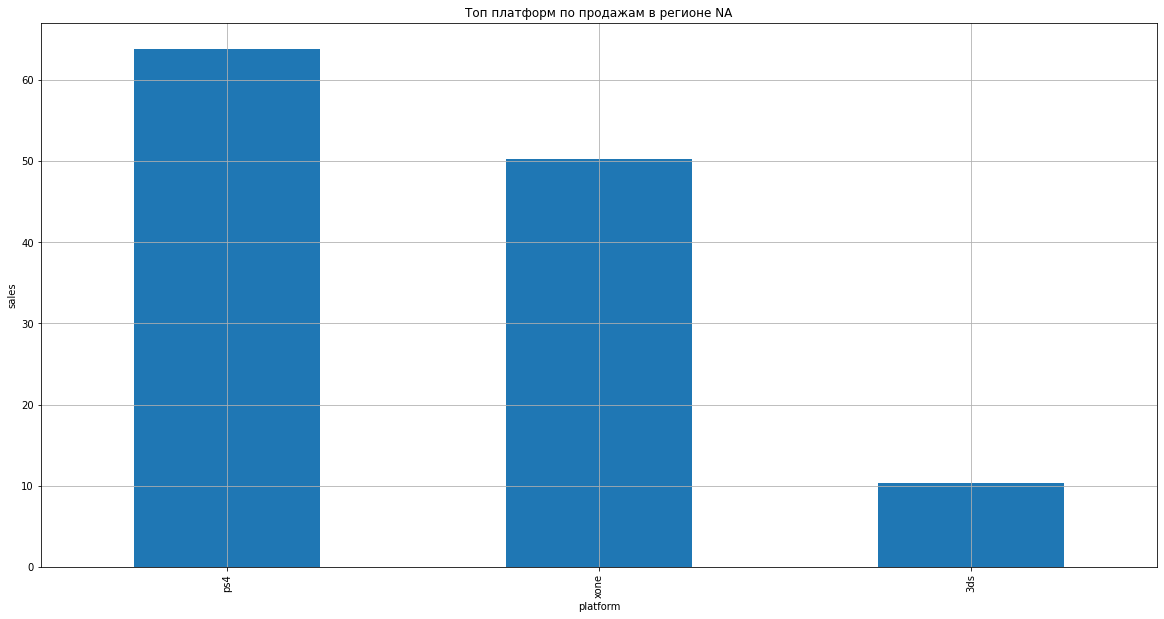

In [48]:
top_platform_na = df_actual.groupby(
    'platform')['na_sales'].sum().sort_values(
    ascending=False).head().plot(
    x='platform', y='na_sales', kind='bar', figsize=(20,10), grid=True, title='Топ платформ по продажам в регионе NA');
plt.xlabel('platform');
plt.ylabel('sales');

Топ платформ в регионе NA:

    1 место - ps4
    2 место - xone
    3 место - 3ds

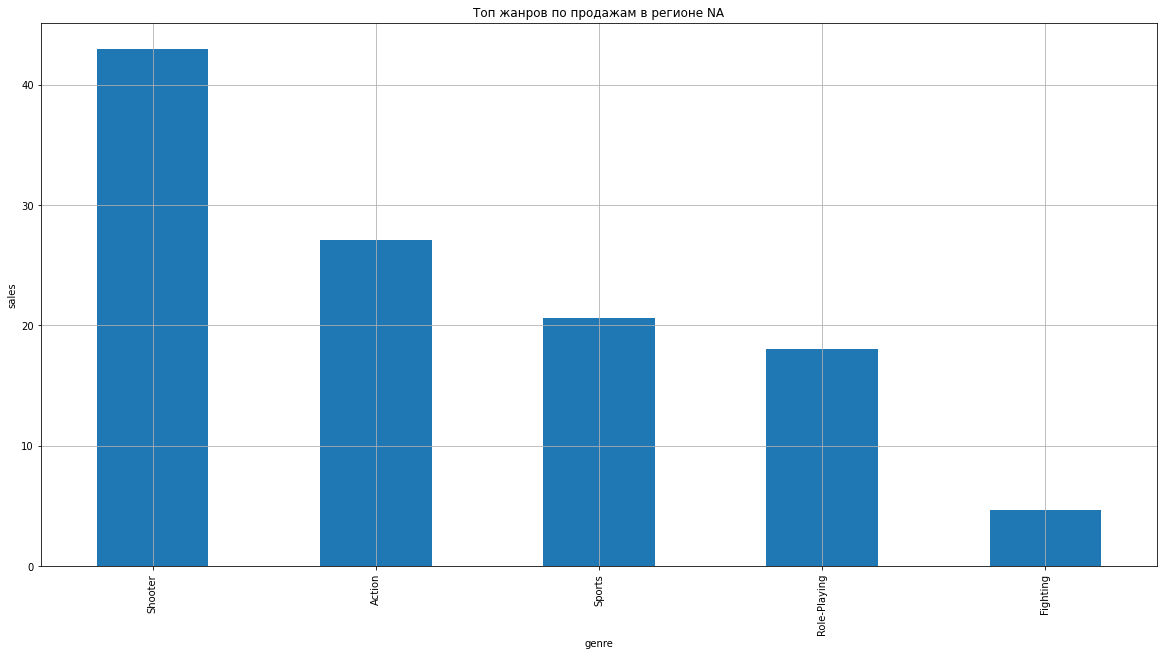

In [49]:
top_genre_na = df_actual.groupby(
    'genre')['na_sales'].sum().sort_values(
    ascending=False).head().plot(
    x='genre', y='na_sales', kind='bar', figsize=(20,10), grid=True, title='Топ жанров по продажам в регионе NA');
plt.xlabel('genre');
plt.ylabel('sales');

Топ жанров в регионе NA:

    1 место - shooter
    2 место - action
    3 место - sports

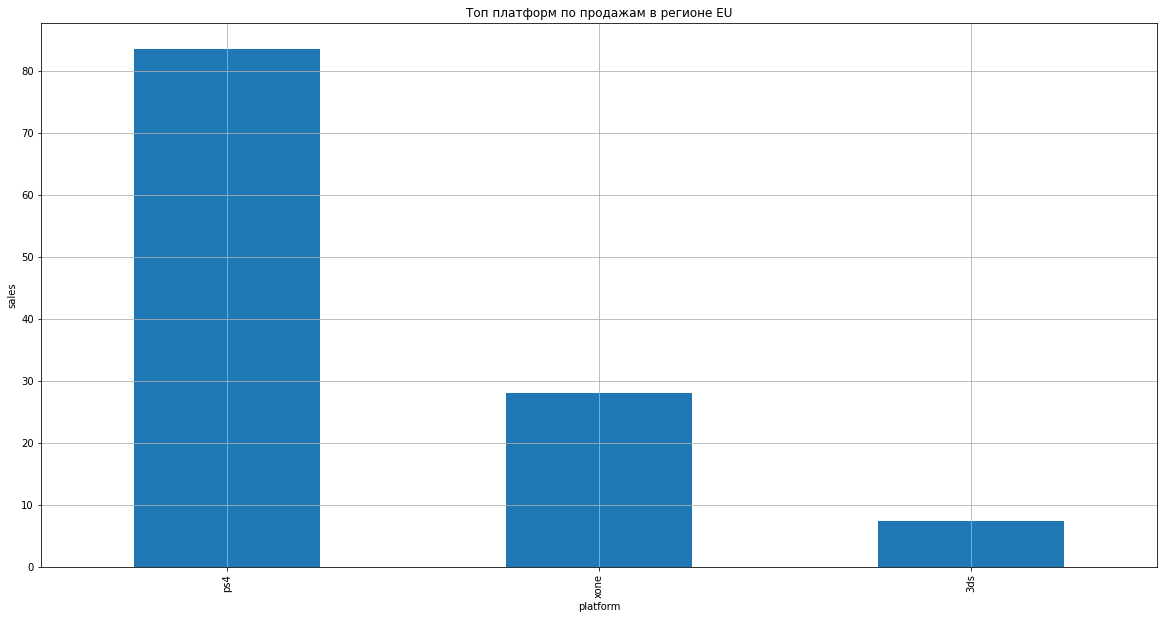

In [50]:
top_platform_eu = df_actual.groupby(
    'platform')['eu_sales'].sum().sort_values(
    ascending=False).head().plot(
    x='platform', y='eu_sales', kind='bar', figsize=(20,10), grid=True, title='Топ платформ по продажам в регионе EU');
plt.xlabel('platform');
plt.ylabel('sales');

Топ платформ в регионе EU:

    1 место - ps4
    2 место - xone
    3 место - 3ds

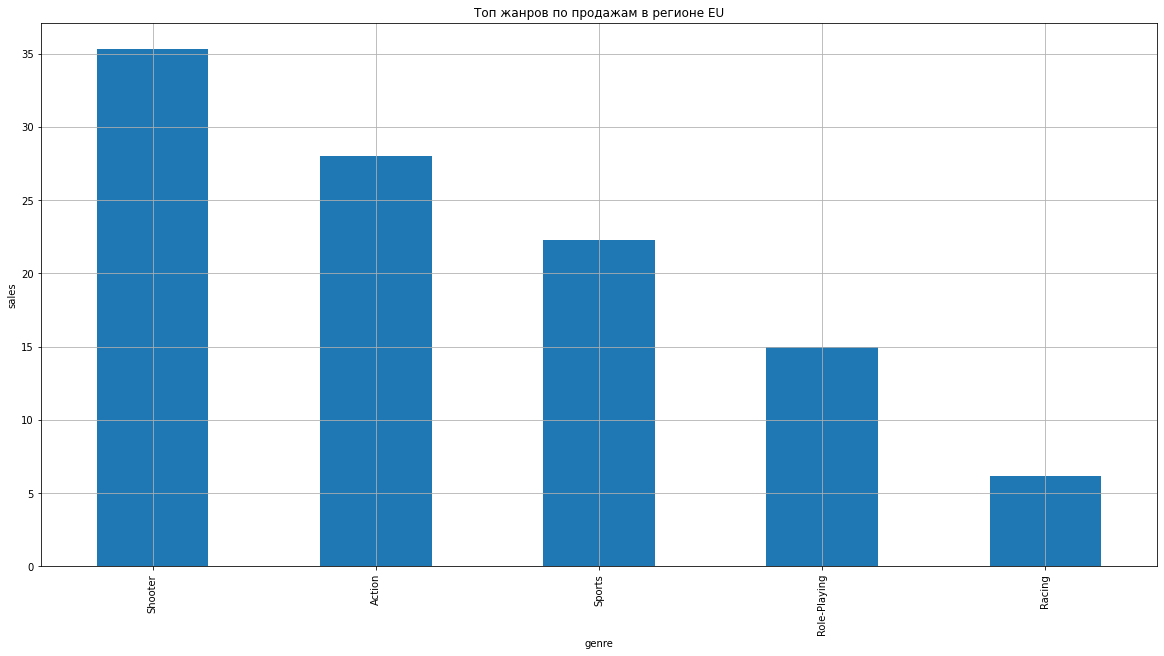

In [51]:
top_genre_eu = df_actual.groupby(
    'genre')['eu_sales'].sum().sort_values(
    ascending=False).head().plot(
    x='genre', y='eu_sales', kind='bar', figsize=(20,10), grid=True, title='Топ жанров по продажам в регионе EU');
plt.xlabel('genre');
plt.ylabel('sales');

Топ жанров в регионе EU:

    1 место - shooter
    2 место - action
    3 место - sports

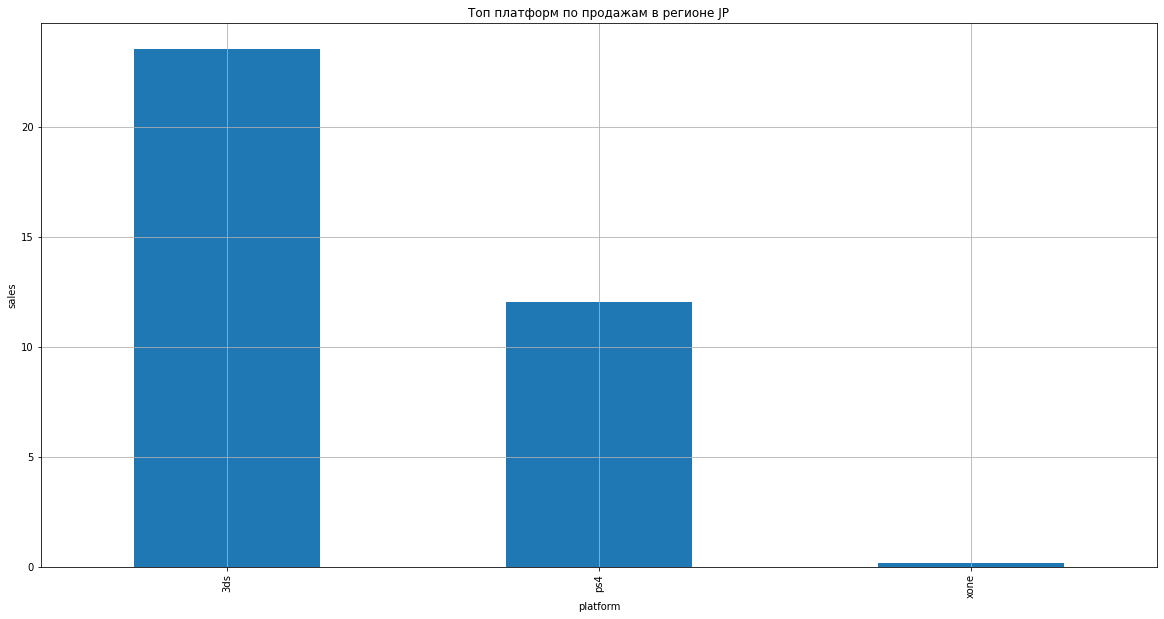

In [52]:
top_platform_jp = df_actual.groupby(
    'platform')['jp_sales'].sum().sort_values(
    ascending=False).head().plot(
    x='platform', y='jp_sales', kind='bar', figsize=(20,10), grid=True, title='Топ платформ по продажам в регионе JP');
plt.xlabel('platform');
plt.ylabel('sales');

Топ платформ в регионе JP:

    1 место - 3ds
    2 место - ps4
    3 место - xone - близка к 0, можно сказать что в рейтинге не учавствует

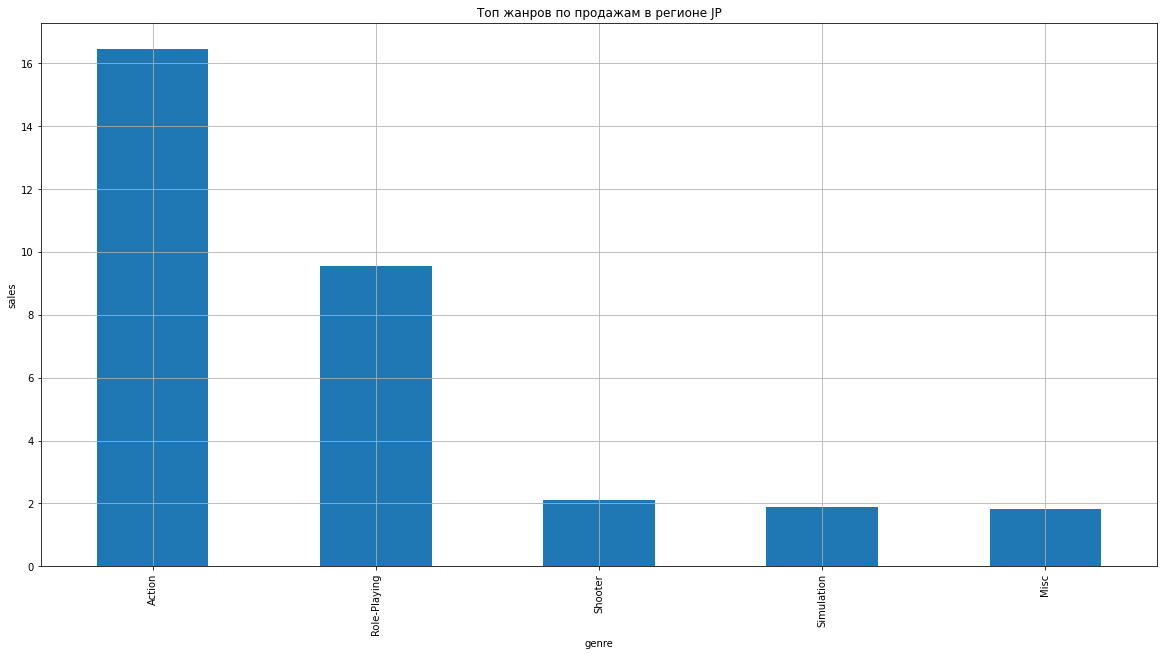

In [53]:
top_genre_jp = df_actual.groupby(
    'genre')['jp_sales'].sum().sort_values(
    ascending=False).head().plot(
    x='genre', y='jp_sales', kind='bar', figsize=(20,10), grid=True, title='Топ жанров по продажам в регионе JP');
plt.xlabel('genre');
plt.ylabel('sales');

Топ жанров в регионе JP:

    1 место - action
    2 место - role-playing
    3 место - shooter

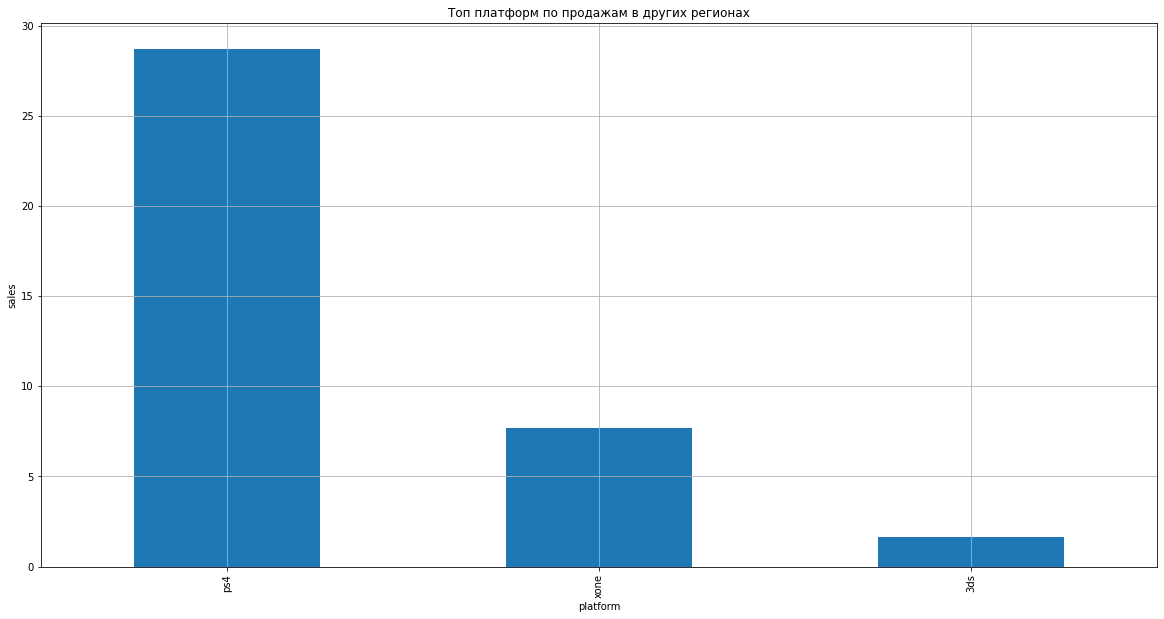

In [54]:
top_platform_other = df_actual.groupby(
    'platform')['other_sales'].sum().sort_values(
    ascending=False).head().plot(
    x='platform', y='other_sales', kind='bar', figsize=(20,10), grid=True, title='Топ платформ по продажам в других регионах');
plt.xlabel('platform');
plt.ylabel('sales');

Топ платформ в других регионах:

    1 место - ps4
    2 место - xone
    3 место - 3ds

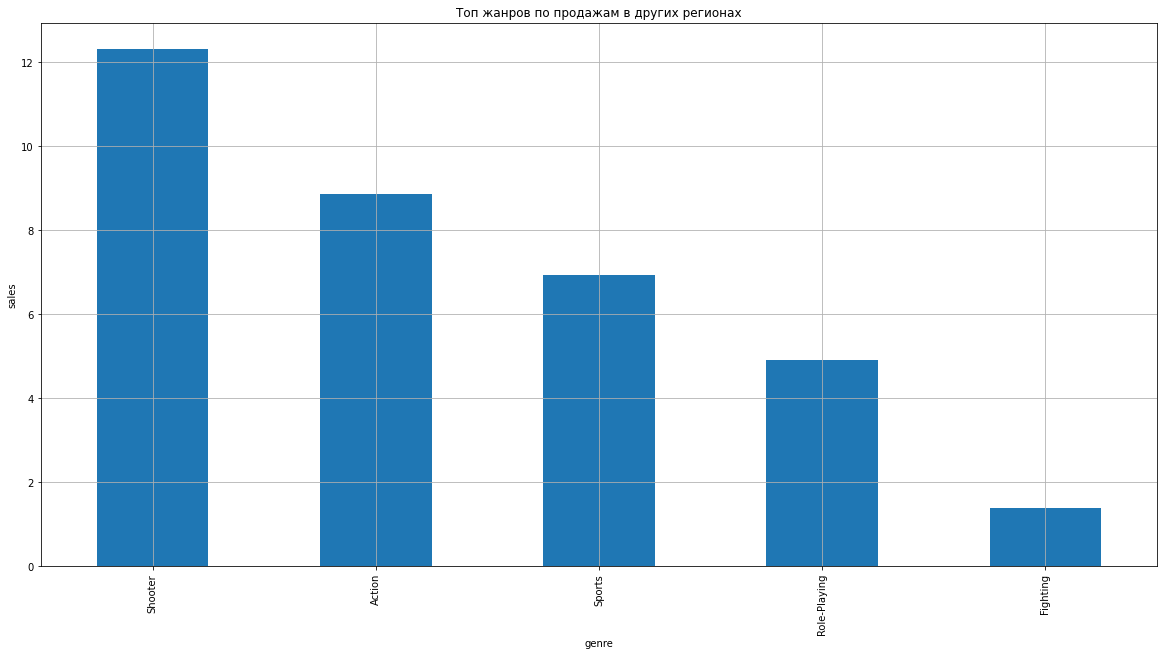

In [55]:
top_genre_other = df_actual.groupby(
    'genre')['other_sales'].sum().sort_values(
    ascending=False).head(5).plot(
    x='genre', y='other_sales', kind='bar', figsize=(20,10), grid=True, title='Топ жанров по продажам в других регионах');
plt.xlabel('genre');
plt.ylabel('sales');

Топ жанров в остальных регионах:

    1 место - shooter
    2 место - action
    3 место - sports

Вывод: 
    
    - в регионах NA, EU и остальных, платформа ps4 самая популярная. Жанры, востребованные в этих регионах - shooter, action, sports.
    - в JP регионе платформа 3ds самая популярная, с большим отрывом. Любимые жанры - action, role-playing, shooter.

##### Проверим, как влияет рейтинг ESRB на продажи в отдельном регионе.

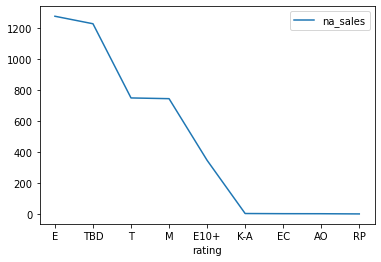

In [56]:
df_esrb_na = df.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).plot();

Рейтинг E, T, M самые востребованные в NA регионе.

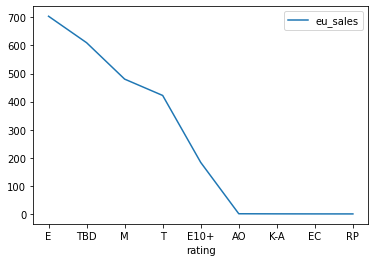

In [57]:
df_esrb_eu = df.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).plot();

Рейтинг E, M, T самые востребованные в EU регионе

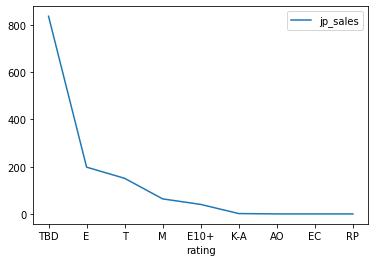

In [58]:
df_esrb_jp = df.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).plot();

Рейтинг E, T, M самые востребованные в JP регионе.

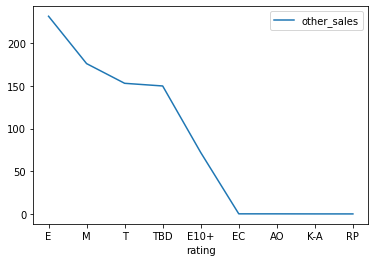

In [59]:
df_esrb_other = df.groupby('rating').agg({'other_sales': 'sum'}).sort_values(by='other_sales', ascending=False).plot();

Вывод: по всем регионам самые продоваемые рейтинги игр - E, M, T.

## 5 Проверка гипотез

###### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой и альтернативной гипотезы мы взяли следующее: 

H0: средние рейтинги по платформам одинаковые 

H1: средние рейтинги по платформам разные

In [60]:
from scipy import stats as st

In [61]:
df_true = df[df['user_score'] != -1] #убираем заглушки с датасета

xbox_user = df_true[df_true['platform'] == 'xone'] #выбор xone платформы
pc_user = df_true[df_true['platform'] == 'pc'] #выбор pc платформы

results =st.ttest_ind(
    xbox_user['user_score'], 
    pc_user['user_score'], 
    equal_var=False) 
 
alpha=0.05 #так как выборка достаточная
 
print(results.pvalue)
if results.pvalue <alpha:
    print("Отвергаем нулевую гипотезу, средние рейтинги по платформам разные")
else :
    print("Не получилось отвергнуть нулевую гипотезу, средние рейтинги по платформам одинаковые")

2.4073039894750292e-05
Отвергаем нулевую гипотезу, средние рейтинги по платформам разные


###### Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотезы "средние пользовательские рейтинги жанров Action и Sports разные" в качестве нулевой и альтернативной гипотезы мы взяли следующее:

H0: средние рейтинги по жанрам одинаковые

H1: средние рейтинги по жанрам разные

In [62]:
action_user = df_true[df_true['genre'] == 'Action'] #выбор жанра Action 
sports_user = df_true[df_true['genre'] == 'Sports'] #выбор жанра Sports 

results =st.ttest_ind(
    action_user['user_score'], 
    sports_user['user_score'], 
    equal_var=False) 
 
alpha=0.05 #так как выборка достаточная
 
print(results.pvalue)
if results.pvalue <alpha:
    print("Отвергаем нулевую гипотезу, средние рейтинги по жанрам разные")
else :
    print("Не получилось отвергнуть нулевую гипотезу, средние рейтинги по жанрам одинаковые")

0.03345275568170738
Отвергаем нулевую гипотезу, средние рейтинги по жанрам разные


### Общий вывод

В результате исследования были выполнены поставленные задачи:

    - Подготвлены данные
    - Проведен исследовательский анализ данных
    - Составлен портрет пользователя каждого региона
    - Проверены гипотезы
    - Выбран актуальный промежуток времени
    - Выбраны актуальные платформы

По итогам проделанной работы можно сделать прогноз на 2017 год:

    - По проведенному анализу можно выделить самую популярную платформу - ps4.
    - По всем регионам самые продоваемые рейтинги игр - E, M, T.
    - Топ жанров в регионе JP - action, roleplay, shooter
    - Топ жанров в регионе EU, NA и остальных - shooter, action, sports.
    - Средние рейтинги по жанрам Action и Sports разные.
    - Cредние рейтинги по платформам PC и XboxOne разные.
    - Продажи внутри одной популярной платформы отзывы пользователей и критиков никак не влияют.

На следующий год ставку можно делать на игру на платформе ps4, так как она популярна в большинстве регионах,в жанрах shooter, action, sports, а так же roleplay для JP региона с возрастной категорией E, M, T, так как они пользуется большим спросом на рынке!